In [214]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [215]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, metrics, model_selection

import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display
from sklearn.neural_network import MLPClassifier

In [216]:
import chardet
import pandas as pd
nombre_archivo = DATOS_DIR + 'vinos.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'], sep=";")

# visualiza el dataframe

df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [217]:
df['Class'].unique()

array([1, 2, 3], dtype=int64)

In [218]:
X = np.array(df.iloc[:, 1:])
Y = np.array(df["Class"])

In [219]:
#conjuntos de entrenamiento y testeo
X_train, X_test, Y_train, Y_test = model_selection.train_test_split( X,Y, test_size=0.20)

normalizarEntrada = 1  # 1 si normaliza; 0 si no
if normalizarEntrada:
    # Escala los valores entre 0 y 1
    scaler  = preprocessing.StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

In [220]:
clf = MLPClassifier( solver='sgd', learning_rate_init=0.05, hidden_layer_sizes=(2),max_iter=700, verbose=False, tol=1.0e-05, activation = 'tanh')
history = clf.fit(X_train,Y_train)

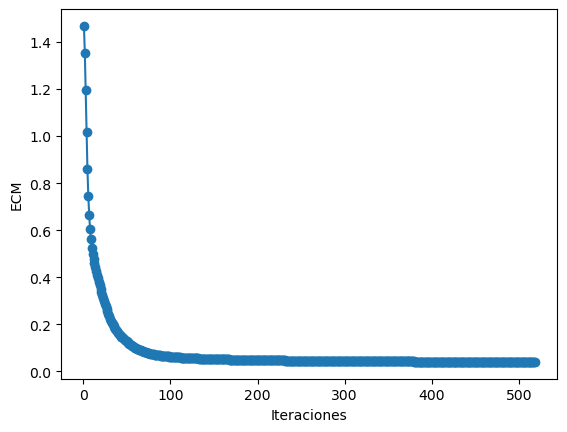

In [221]:
plt.plot(range(1, len(history.loss_curve_) + 1), history.loss_curve_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('ECM')
plt.show()

In [222]:
Y_pred = clf.predict(X_train)
print("%% aciertos X_train : %.3f" % metrics.accuracy_score(Y_train,Y_pred))
report = metrics.classification_report(Y_train,Y_pred)
print("Confusion matrix Training:\n%s" % report)
MM = metrics.confusion_matrix(Y_train,Y_pred)
print("Confusion matrix:\n%s" % MM) 

% aciertos X_train : 0.993
Confusion matrix Training:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        49
           2       0.98      1.00      0.99        53
           3       1.00      0.97      0.99        40

    accuracy                           0.99       142
   macro avg       0.99      0.99      0.99       142
weighted avg       0.99      0.99      0.99       142

Confusion matrix:
[[49  0  0]
 [ 0 53  0]
 [ 0  1 39]]


In [223]:
Y_pred = clf.predict(X_test)
print("%% aciertos X_train : %.3f" % metrics.accuracy_score(Y_test,Y_pred))
report = metrics.classification_report(Y_test,Y_pred)
print("Confusion matrix Training:\n%s" % report)
MM = metrics.confusion_matrix(Y_test,Y_pred)
print("Confusion matrix:\n%s" % MM) 

% aciertos X_train : 0.944
Confusion matrix Training:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.93      0.93      0.93        15
           3       0.91      0.91      0.91        11

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36

Confusion matrix:
[[10  0  0]
 [ 0 14  1]
 [ 0  1 10]]
